# Aprendizado Supervisionado e K Vizinhos mais Próximos

## Introdução

Nós utilizaremos a base de dados de taxa de rejeição da indústria de telecomunicações para essa lista de exercícios. A base de dados tem o nome `Orange_Telecom_Churn_Data.csv`. Nesse notebook carregaremos a base de dados, faremos algum pré-processamento e usaremos a técnica k-NN para predizer a taxa de rejeição baseado nas características mensuradas.

## Exercício 1

* Comece importando os dados através do pandas. Examine as colunas e os dados
* Note que os dados contêm estado, código de área e telefone. Você acha que esses atributos são interessantes para construir nosso modelo de classificação? Por que?

Não utilizaremos esses atributos para essa base, então eles podem ser removidos do dataframe (método `drop`).

In [1]:
import pandas as pd

arquivo = 'data/Orange_Telecom_Churn_Data.csv'
data = pd.read_csv(arquivo)
data.head()
data.drop(['state', 'area_code', 'phone_number'], axis = 1, inplace = True)
data.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Exercício 2

* Note que algumas das colunas são categóricas e algumas são *float*. Esses atributos precisam ser numéricos para usar os algoritmos que aprenderemos no curso.
* Finalmente, o algoritmo K-Vizinhos mais próximos necessita de dados escalonados. Escalone os dados utilizando um dos métodos aprendidos em aula.

In [2]:
import warnings
warnings.filterwarnings('ignore', module='sklearn')
from sklearn.preprocessing import MinMaxScaler

bin_cols = ['intl_plan', 'voice_mail_plan', 'churned']

scaler = MinMaxScaler()
data[data.columns.difference(bin_cols)] = scaler.fit_transform(data[data.columns.difference(bin_cols)])

data = pd.get_dummies(data, columns=bin_cols, drop_first=True)

## Exercício 3

* Separe as colunas de atributos (todas menos `churned`) da  coluna de rótulo (`churned`). Isso criará duas tabelas.
* Aplique o método `.fit()` do K-nearest neighbors com um valor de `n_neighbors=3` para essa base de dados e verifique o resultado com o método `.predict()` na mesma base.

In [3]:
x_cols = [x for x in data.columns if x != 'churned_True']

X_data = data[x_cols].values
y_data = data[data.columns.difference(x_cols)].values.ravel()

In [4]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_data, y_data)
predict = knn.predict(X_data)

## Exercício 4

Ainda não ensinamos formas de medir o erro, mas a acurácia é um conceito simples de entender--é a porcentagem de rótulos que foram corretamente classificados:

$acc = \frac{corretos}{total}$

* Escreva uma função para calcular a acurácia usando os rótulos verdadeiros e os preditos.
* Usando a função, calcule a acurácia do K-nn nos dados.

In [6]:
def accuracy(real, predict):
    concat = pd.concat([pd.Series(y_data), pd.Series(predict)], axis=1).values
    
    certos = pd.Series([1 if x == y else 0 for x, y in concat])
    return certos.sum()/certos.size

accuracy(y_data, predict)

0.9422

## Exercício 5

* Repita a aplicação do modelo K-nearest neighbors mas com o parâmetro `weights=distance`. Calcule a acurácia da função criada por você.
* Repita a aplicação do modelo com `n_neighbors=3`, `weights=uniform` e `p=1` para utilizar a distância de Manhattan. Verifique os resultados.

Quando as distâncias ponderadas são utilizadas para a parte 1 dessa questão, vocês obterão acurácia de 1.0. Por que isso ocorre? *Dica:* o KNN usa diretamente os dados para fazer a predição.

In [7]:
knn2 = KNeighborsClassifier(n_neighbors=3, weights='distance')

knn2.fit(X_data, y_data)
predict = knn2.predict(X_data)

accuracy(y_data, predict)

1.0

In [8]:
knn3 = KNeighborsClassifier(n_neighbors=3, weights='uniform', p=1)

knn3.fit(X_data, y_data)
predict = knn3.predict(X_data)

accuracy(y_data, predict)

0.9456

## Exercício 6

* Teste o modelo KNN utilizando valores de `n_neighbors` na faixa de 1 a 20. Deixe o restante dos parâmetros como o padrão. Armazene os valores de vizinhos e acurácia em uma lista no formato [(k, acuracia)].
* Plote um gráfico do tipo *scatter* da acurácia vs vizinhos. O que acontece com `n_neighbors=1`? Por que isso ocorre?

In [9]:
score_list = list()

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_data, y_data)
    predict = knn.predict(X_data)
    acc = accuracy(y_data, predict)
    
    score_list.append((k, acc))

score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])

In [10]:
# Import libraries to make the plot

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

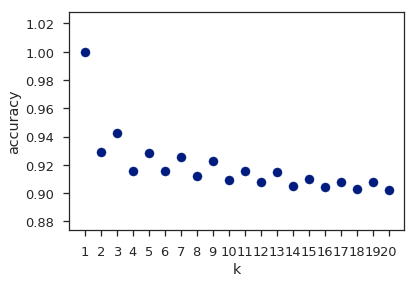

In [11]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

plt.scatter(score_df.k, score_df.accuracy)
_ = plt.xticks(range(1, 21))
_ = plt.xlabel('k')
_ = plt.ylabel('accuracy')